In [1]:
%load_ext tikzmagic
%matplotlib inline

# 탐색적 데이터 분석

EDA(Exploratory Data Analysis)라고도 부르는 탐색적 데이터 분석은 데이터 각각에 대한 특징을 찾아내는 작업이다. 탐색적 데이터 분석에서 찾아내야 할 데이터의 특징은 여러가지가 있지만 가장 중요한 것은 해당 데이터가 어떤 확률분포를 따르며 확률분포함수의 모수가 어떤 값을 가지는지를 추정하는 것이다.

탐색적 데이터 분석에서 수행해야 할 일은 다음과 같다.

* 데이터의 개수
* 데이터 중 누락 혹은 잘못된 데이터의 개수
* 데이터가 수치형 데이터인지 범주형 데이터인지 유형 판단
* 데이터의 대표값 (수치형 데이터의 경우에는 평균이나 중간값, 범주형 데이터의 경우에는 최빈값)
* 데이터의 최대/최소값 혹은 분산
* 데이터의 제한조건 (수치형 데이터의 경우에는 제한조건, 범주형 데이터의 경우에는 범주값의 종류)
* 데이터의 확률분포 및 모수


## 탐색적 데이터 분석의 예 : 팁 데이터

지금까지 많이 살펴보았던 팁 데이터에 대해 탐색적 데이터 분석을 하면 다음과 같은 결과를 얻을 수 있다.

In [2]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

### 데이터의 개수

데이터프레임에 포함된 데이터의 개수는 `len` 함수로 구한다.

In [3]:
len(tips)

244

열 별로 각각 데이터의 개수를 셀 때는 `count` 메서드를 사용한다.

In [4]:
tips.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

`info` 메서드를 사용할 수도 있다.

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### 데이터 유형

데이터의 유형은 일차적으로 데이터프레임의 `dtypes` 속성으로 파악할 수 있다. float 타입이면 수치형이고 category 타입이면 범주형이다. 다만 숫자임에도 불구하고 문자열로 되어 category 타입으로 나타내는 경우도 있기 때문에 주의를 요한다. int 타입일 경우에는 일반적으로 수치형으로 보지만 경우에 따라서는 범주형으로 취급할 수도 있다. 

In [6]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

위 결과에서 total_bill, tip, size는 수치형 데이터이고 sex, smoker, day, time은 범주형 데이터임을 알 수 있다.

### 수치형 데이터의 통계

수치형 데이터의 개수나 평균, 최대/최소값 등은 pandas 데이터프레임의 `describe` 메서드로 얻을 수 있다. 

In [7]:
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

### 범주형 데이터의 범위

범주형 데이터가 가질 수 있는 값의 종류와 범위를 구하려면 해당 열의 `describe` 및 `unique` 메서드를 사용한다.

In [8]:
tips.sex.describe()

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

In [9]:
tips.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

### 데이터 누락

데이터의 누락을 알아보기 위해서는 missingno 패키지를 사용한다. 만약 누락된 데이터가 있다면 `bar` 함수를 사용했을 때 해당 개수가 표시된다.

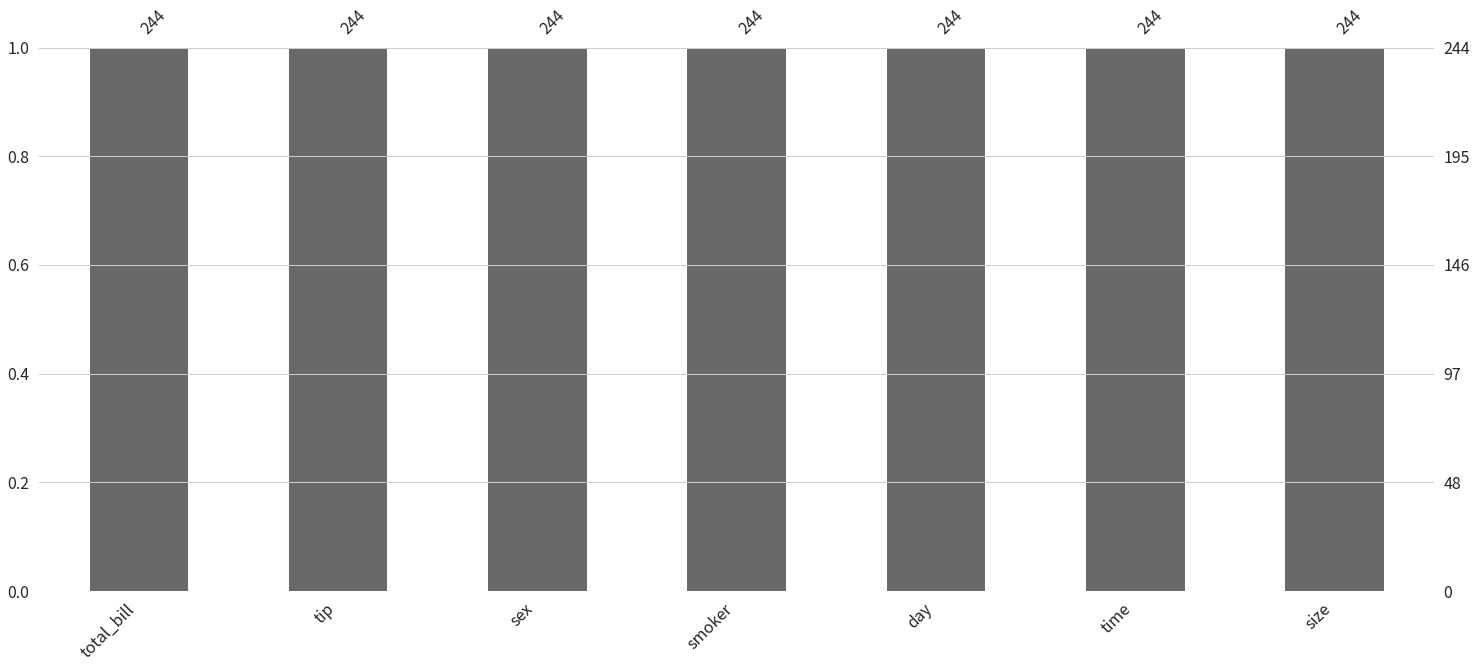

In [10]:
import missingno as msno

msno.bar(tips)
plt.show()

팁 데이터의 경우에는 누락된 데이터가 없다는 것을 알 수 있다. 만약 누락 데이터가 존재한다면 해당 열이나 행을 삭제하여 사용하지 않거나 추정값으로 대체(imputation)하는 방법이다. 누락된 데이터를 추정값으로 대체하는 방법에 대해서는 별도로 자세히 다루기로 한다.

### 데이터 제한조건

다음으로 데이터가 가진 제한조건을 파악한다. 이 부분은 프로그램으로는 알아내기 어렵고 데이터에 대한 도메인 지식을 갖춘 사람이 스스로 생각해 낼 수 밖에 없다.

* total_bill은 금액이므로 음수가 될 수 없다. 따라서 0 또는 양수이어야 한다.
* tip도 금액이므로 음수가 될 수 없다. 따라서 0 또는 양수이어야 한다.
* size는 사람의 수이므로 자연수이어야 한다.

### 데이터의 확률분포 및 모수추정

가장 중요한 작업은 각 데이터의 확률분포와 모수를 추정하는 것이다. distfit 패키지를 사용하면 여러가지 후보군 중에서 가장 유사한 확률분포를 자동으로 찾아준다.
사용방법은 다음과 같다. 여기에서는 예로 total_bill 데이터만 살펴본다.

In [11]:
from distfit import distfit

dist = distfit(distr='popular')

result = dist.fit_transform(tips.total_bill)
result["model"]

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.00974729] [loc=19.786 scale=8.884]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0242953] [loc=3.070 scale=16.716]
[distfit] >[pareto    ] [0.02 sec] [RSS: 0.0637558] [loc=-0.002 scale=3.072]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 0.0077273] [loc=18.090 scale=6.866]
[distfit] >[t         ] [0.04 sec] [RSS: 0.0077672] [loc=18.416 scale=6.880]
[distfit] >[genextreme] [0.08 sec] [RSS: 0.00510926] [loc=15.620 scale=6.435]
[distfit] >[gamma     ] [0.01 sec] [RSS: 0.00568935] [loc=1.647 scale=4.060]
[distfit] >[lognorm   ] [0.05 sec] [RSS: 0.00522484] [loc=-1.597 scale=19.743]
[distfit] >[beta      ] [0.09 sec] [RSS: 0.00569416] [loc=1.654 scale=9567.297]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.023091] [loc=3.070 scale=47.740]
[distfit] >[loggamma  ] [0.05 sec] [RSS: 0.0100567] [loc=-2934.138 scale=391.595]
[distfit] >Compute confidence interval [parametric]


{'distr': <scipy.stats._continuous_distns.genextreme_gen at 0x12cd73550>,
 'stats': 'RSS',
 'params': (-0.06487665152494221, 15.620296989853873, 6.434860032529421),
 'name': 'genextreme',
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x131905900>,
 'score': 0.00510925584681514,
 'loc': 15.620296989853873,
 'scale': 6.434860032529421,
 'arg': (-0.06487665152494221,),
 'CII_min_alpha': 8.80546496271512,
 'CII_max_alpha': 36.69877720209486}

이 결과에서 total_bill 데이터는 genextreme 이라는 분포를 따르는 것으로 나타났다. 이 분포는 "일반화 극단값 분포"라는 확률분포다. `summary` 속성값에는 각 후보 확률분포에 대한 추정 오차값(score)과 모수값이 들어있다. 오차값이 적을수록 해당 확률분포일 가능성이 높다. 다음 결과에서 로그정규분포는 일반화 극단값 분포과 비슷한 오차를 가지고 있는 것을 알 수 있다. 따라서 total_bill은 로그정규분포라고 볼 수도 있다.

In [12]:
print(dist.summary)

         distr     score  LLE         loc        scale  \
0   genextreme  0.005109  NaN   15.620297      6.43486   
1      lognorm  0.005225  NaN   -1.596509      19.7426   
2        gamma  0.005689  NaN    1.647296     4.060375   
3         beta  0.005694  NaN    1.653744  9567.296558   
4     dweibull  0.007727  NaN   18.089662      6.86644   
5            t  0.007767  NaN   18.416264     6.880142   
6         norm  0.009747  NaN   19.785943     8.884151   
7     loggamma  0.010057  NaN -2934.13787   391.594895   
8      uniform  0.023091  NaN        3.07        47.74   
9        expon  0.024295  NaN        3.07    16.715943   
10      pareto  0.063756  NaN   -0.002397     3.072397   

                                       arg  
0                  (-0.06487665152494221,)  
1                   (0.39848779123634986,)  
2                     (4.467235739845137,)  
3   (4.45582554677317, 2346.2257696617125)  
4                    (1.0929626891064381,)  
5                     (4.56394236

`plot_summary` 메서드를 사용하면 후보 확률분포들의 오차를 플롯으로 그려준다.

[distfit] >plot summary..


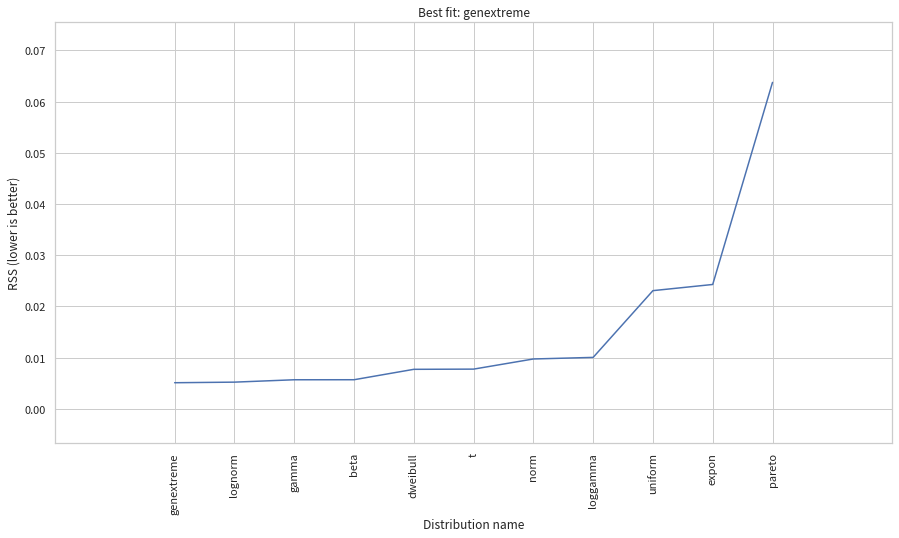

In [13]:
dist.plot_summary()
plt.show()

seaborn 패키지의 `distplot` 함수를 이용하여 로그정규분포로 추정한 결과를 비교하면 다음과 같다.

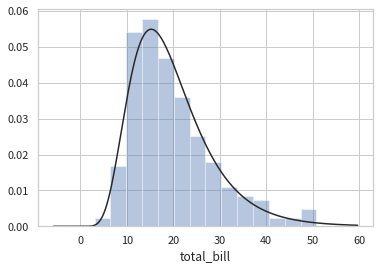

In [14]:
from scipy.stats import lognorm

sns.distplot(tips.total_bill, fit=lognorm, kde=False)
plt.show()

## pandas_profiling 패키지

pandas_profiling 패키지를 사용하면 확률분포 추정을 제외한 대부분을 작업을 자동으로 해준다. 사용법은 다음과 같다.

In [15]:
from pandas_profiling import ProfileReport

ProfileReport(tips, progress_bar=False, minimal=True, html={"navbar_show": False})